# Gen Y can’t millennials afford housing? (group002)

# Overview

A growing concern for many millennials is the inability to own a house earlier in life and experience financial stability that seems to have come more easily to older generations. In order to determine if such an issue exists, we set out to examine whether there was a correlation between the average age of individuals living in an area and the cost of living in that same area. We hypothesized that the median housing value would increase as the median age increased which we based on the notion that older people tend to have more financial stability and wealth than younger generations. Similarly, we assumed that places with higher average property values would also, on average, have a higher population of older people. Despite running different analyses on our data, we were not able to conclusively find a clear relationship between the variables because we did not have sufficient data to answer our research question.

# Names

- Akil Iyer
- Casey Lee
- Doanh Thai
- Sepideh Kiumarsi

<a id='research_question'></a>
# Research Question

Was there a relationship between the median age and the median cost of living across congressional districts in a given state in 2019?

<a id='background'></a>

## Background & Prior Work

Recently, there has been more scrutiny of younger generations’ ability to afford to buy homes. Some literature on this issue supports the position that, for younger generations, it seems as though the path is not as easy as it was for their grandparents. Noah Smith notes that “[m]illennials can’t afford homes after exiting the basement.” In fact, in 2019, millennials only possessed one-third of the US housing stock (5%) compared to previous generations at the same age (15%). As this is a problem that directly relates to us, we were interested in finding out whether the data shows that young people have disproportionately fewer homes than their older counterparts. As Smith states, one possible solution to this problem is implementing new policies that will increase housing ownership while also bridging the gap of wealth between millennials and older generations. By stating policies that aim to bridge age gaps in housing disparities, the researchers argue that age is a primary factor contributing to younger generations owning less housing stock.

Not everyone agrees, however, that this issue exists outside of these individuals’ social control. In fact, one supporter of this view is Aaron Hankin, who states in “The real reason millennials aren’t buying homes,” that rather than only one reason contributing to this concerning problem, there are many possible reasons that separate today’s youth from their predecessors — marriageable age, student debt, location, and affordability, for example. We decided to use data from the 2019 US census database in order to see whether age and affordability could be proven by data as one of these differences and to see whether there was a link between these two variables

# Hypothesis


We hypothesize that, in the United States, younger people are subjected to higher costs of living than older people due to the increasing discrepancy between cost of living and household income.

# Dataset(s)

### **Dataset Name: List of Congressional Districts**
- **Link to the dataset**: https://en.wikipedia.org/wiki/Cook_Partisan_Voting_Index (web-scraped wikitable)
- **Features/variables included**: District, PVI, Party of Representative - only District to be retained
- **Number of observations**: 435 congressional districts
- **Dataset description**: This Wikipedia page includes a table that lists all of the congressional districts in the United States using the format "{State} {District #}", which is helpful for us to pull out as a `Series` from the table after passing it into `pandas` as a `DataFrame`. This list is then edited to use to access the census .CSV files described below.


### **Dataset Name: 2019 Census of the United States of America**
- **Link to the dataset**: https://www.census.gov/mycd/ (CSV download option at the bottom right after state/district selection)
- **Features/variables included**: we use median age by congressional district, median housing value by congressional district
- **Number of observations**: 435 congressional districts via 50 states
- **Dataset description**: The census data is in the .CSV format and includes estimates and margins of error for each congressional district in the United States. Data for a given congressional district can be found in the file for the state in which it can be found, which applies to cases where a state is a district at-large and where there are multiple congressional districts in a given state. Rows pertain to a given question on the census and its answer, with the first few columns specifying the categories of the question and the following columns representing the values provided as the answers. For each congressional district, an estimate of the value is provided in a column with the margin of error for that value in the following column. Though we do not necessarily plan to use multiple datasets per se, the .CSV data we are downloading from the website above comes in a separate file for each state, so we have 50 files with parallel semi-structured data.

# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context = 'talk', style='white')
plt.rcParams['figure.figsize'] = (20, 10)

df = pd.DataFrame(pd.read_html('https://en.wikipedia.org/wiki/Cook_Partisan_Voting_Index')[0])
df

,District,PVI,Party ofrepresentative
0,Alabama 1,R+15,Republican
1,Alabama 2,R+16,Republican
2,Alabama 3,R+16,Republican
3,Alabama 4,R+30,Republican
4,Alabama 5,R+18,Republican
...,...,...,...
430,Wisconsin 5,R+13,Republican
431,Wisconsin 6,R+8,Republican
432,Wisconsin 7,R+8,Republican
433,Wisconsin 8,R+7,Republican


# Data Cleaning

After importing the congressional districts table, we drop the non-`district` columns, and construct a column for the state. We create filenames to refer to the .CSV census files using the state to access the file. The district column is then simplified to only refer to the number of the district within that state, removing the reference to the state from the district column altogether; this column is then used to access the value estimates from the data for the respective districts in a given state's .CSV file. Finally, we use these two columns to access our data of interest from what we refer to as our second dataset above and pull out the median age of a congressional district (`float`) and median housing value of a congressional district (`int`), appending it to its respective row in the final dataframe `df`. We choose this .CSV format because it ensures that it's tidy, that each row corresponds to a single data point (a congressional district), and that the columns pertain to a variable, which is something that was not provided natively in the .CSV files we downloaded directly from the census website.

First, we standardize the naming of the columns and only retain the 'district' column.

In [2]:
[df.drop(columns=[col], inplace=True) for col in df.columns if col!='District']
df.columns = df.columns.str.lower()
df['state'] = [dist.split('\xa0')[0] for dist in df.district]
df

,district,state
0,Alabama 1,Alabama
1,Alabama 2,Alabama
2,Alabama 3,Alabama
3,Alabama 4,Alabama
4,Alabama 5,Alabama
...,...,...
430,Wisconsin 5,Wisconsin
431,Wisconsin 6,Wisconsin
432,Wisconsin 7,Wisconsin
433,Wisconsin 8,Wisconsin


Then, we construct a 'filenames' column that we use to access the census CSV data.

In [3]:
filenames = []

for dist in df['district']:
  if dist.split()[len(dist.split()) - 1][0] in '1234567890':
    filenames.append(f'{"_".join(dist.split()[:len(dist.split()) - 1])}_District_all.csv')
  else:
    filenames.append(f"{dist.replace(' ', '_').replace('at-large', '_District_At_Large')}.csv")

df['filenames'] = [file.replace('\xa0', '') for file in filenames]
df

,district,state,filenames
0,Alabama 1,Alabama,Alabama_District_all.csv
1,Alabama 2,Alabama,Alabama_District_all.csv
2,Alabama 3,Alabama,Alabama_District_all.csv
3,Alabama 4,Alabama,Alabama_District_all.csv
4,Alabama 5,Alabama,Alabama_District_all.csv
...,...,...,...
430,Wisconsin 5,Wisconsin,Wisconsin_District_all.csv
431,Wisconsin 6,Wisconsin,Wisconsin_District_all.csv
432,Wisconsin 7,Wisconsin,Wisconsin_District_all.csv
433,Wisconsin 8,Wisconsin,Wisconsin_District_all.csv


Then, we rename the 'district' column to a format compatible with how the data is stored in the census CSV files.

In [4]:
distnums, newdist = ['1', '2', '3', '4' ,'5', '6', '7', '8', '9'], []
for dist in df['district']:
  if dist.split()[len(dist.split())-1] in distnums:
    newdist.append(f'District 0{dist.split()[len(dist.split())-1]}')
  elif dist.split()[len(dist.split())-1] == 'at-large':
    newdist.append(f'District (At Large)')
  else:
    newdist.append(f'District {dist.split()[len(dist.split())-1]}')

df['district'] = newdist
df

,district,state,filenames
0,District 01,Alabama,Alabama_District_all.csv
1,District 02,Alabama,Alabama_District_all.csv
2,District 03,Alabama,Alabama_District_all.csv
3,District 04,Alabama,Alabama_District_all.csv
4,District 05,Alabama,Alabama_District_all.csv
...,...,...,...
430,District 05,Wisconsin,Wisconsin_District_all.csv
431,District 06,Wisconsin,Wisconsin_District_all.csv
432,District 07,Wisconsin,Wisconsin_District_all.csv
433,District 08,Wisconsin,Wisconsin_District_all.csv


Finally, we extract the data we want to use - median age and median housing value for each district from the states' CSV files through the columns for their respective district(s).

In [5]:
age, hous = [], []
for row in range(len(df)):
#     print(f"{df['state'][row]} {df['district'][row]}", end='\t\t')
    data, col = pd.read_csv(f"census/{df['filenames'][row]}"), f"{df['district'][row]} Estimate"
    age.append(float(data[data['Title'] == 'Median age (years)'][col]))
    hous.append(int(data[(data['Title'] == 'Median (dollars)') & (data['Subject'] == 'Value')][col]))

df['med_age'], df['med_hous'] = age, hous
df.drop('filenames', 1, inplace=True)
df

,district,state,med_age,med_hous
0,District 01,Alabama,40.4,160600
1,District 02,Alabama,39.0,135500
2,District 03,Alabama,38.9,144700
3,District 04,Alabama,41.1,132800
4,District 05,Alabama,39.7,173300
...,...,...,...,...
430,District 05,Wisconsin,42.5,252700
431,District 06,Wisconsin,42.0,174700
432,District 07,Wisconsin,45.0,168100
433,District 08,Wisconsin,40.8,180000


To make sure our dataset is actually clean and usable after our data wrangling steps are carried out, we check for `NaN` values in any of the columns and make sure the data types are consistent and appropriate.

In [6]:
df.isnull().any()

district    False
state       False
med_age     False
med_hous    False
dtype: bool

In [7]:
df.dtypes

district     object
state        object
med_age     float64
med_hous      int64
dtype: object

# Data Analysis & Results

In the `pandas` `describe` function below, we first see that there are 435 data points, one for each congressional district, within each quantitative column.

The standard deviation of \\$208,148.70 for median housing value reflects the economic disparity of housing availability, access, and affordability in the way that it varies drastically throughout the country based on factors such as geography, socioeconomic status, and other demographic information, for example. The range of \\$1,502,800 from a minimum of \\$85,600 and a maximum of \\$1,588,400 parallels this high standard deviation in the median housing values across congressional districts. Due to this high variance in the data in that column, we don't work with the mean of \\$298,035, but instead with the median of \\$231,600, as that is less susceptible to the higher outliers present in the dataset (as evidenced by the mean being higher than the median by \\$66,435.

The standard deviation of median age is quite low, at 3.638 years. We choose to work with the median rather than the mean to keep it consistent with the housing value data, since otherwise the mean of 38.804 years barely differs from the mean of 38.800 years. This indicates much less skew in the data in this column.

In [8]:
df.describe()

,med_age,med_hous
count,435.000000,4.350000e+02
mean,38.804368,2.980352e+05
std,3.638131,2.081487e+05
min,28.700000,8.560000e+04
25%,36.600000,1.648500e+05
50%,38.800000,2.316000e+05
75%,40.850000,3.490000e+05
max,56.000000,1.588400e+06


The distribution of districts' median age is quite normal and unimodal. The peak, representing the median median age in years, is 38.800 years, as found in the `describe` section above.

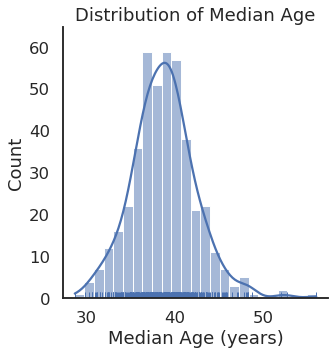

In [9]:
sns.displot(data=df, x='med_age', kde=True, rug=True)
# print(f'modes: {list(df["med_age"].mode())}')
plt.title('Distribution of Median Age')
plt.xlabel('Median Age (years)')
plt.show()

The distribution of districts' median housing value is very positively skewed and unimodal around a value slightly less than \\$200,000. There seem to be visible outliers beyond \\$1,000,000, clarifying the positive skew we expected from the `describe` section above.

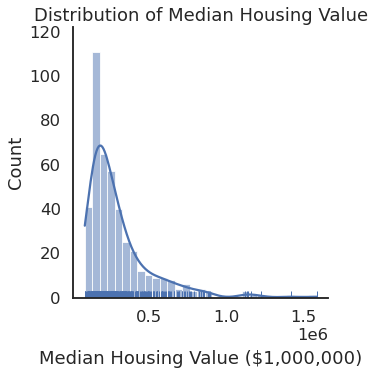

In [10]:
sns.displot(data=df, x='med_hous', kde=True, rug=True)
# print(f'modes: {list(df["med_hous"].mode())}')
plt.title('Distribution of Median Housing Value')
plt.xlabel('\nMedian Housing Value ($1,000,000)')
plt.show()

From the scatterplot, we see that there is not a clear relationship between the median age and median housing values for congressional districts, which is further clarified by the correlation coefficient of `r = -0.049`. Since this correlation coefficient is so close to 0, it would not be sufficient to continue analysis by simply comparing districts' median age to median housing values, so we should instead use a derived statistic for analysis.

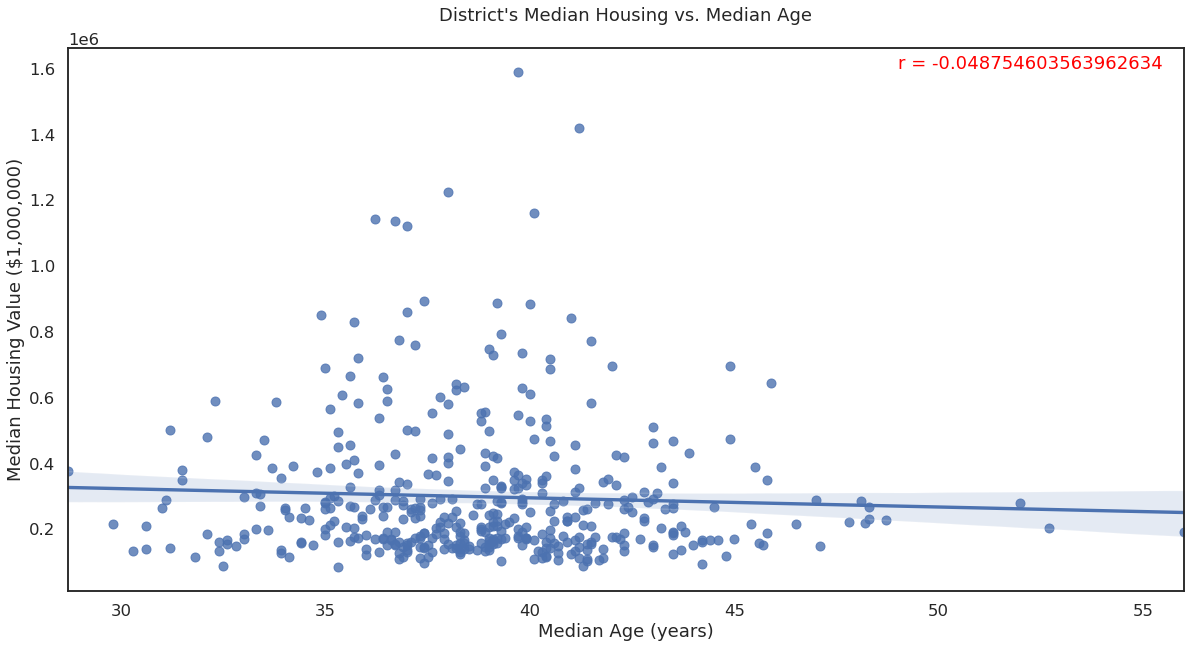

In [11]:
sns.regplot(data=df, x='med_age', y='med_hous')
plt.title('District\'s Median Housing vs. Median Age\n')
plt.xlabel('Median Age (years)')
plt.ylabel('Median Housing Value ($1,000,000)')
plt.text(49, 1600000, f"r = {df['med_age'].corr(df['med_hous'])}", c='red')

plt.show()

In the following section we use the `1.5*IQR` method to determine which values in each quantitative column are outliers by calculating outlier bounds of `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`.

In [12]:
IQR, outlier_bounds = {}, {}

print("\033[1m" + "\033[4m" + 'outlier bounds:' + "\033[0m")
for col in ['med_age', 'med_hous']:
    q75, q25 = df[col].quantile(0.75), df[col].quantile(0.25)
    IQR = q75 - q25
    outlier_bounds[col] = pd.IntervalIndex.from_tuples([(q25 - 1.5*IQR, q75 + 1.5*IQR)])
    print(f'{col}: {str(outlier_bounds[col][0])}')

outlier bounds:
med_age: (30.225000000000012, 47.22499999999998]
med_hous: (-111375.0, 625225.0]


Creation of a temporary `outlier_df` dataframe demonstrating whether a value is an outlier (`True`) or not (`False`) is conducted by comparing whether a value is not within the ranges established above. By summing each column in `outlier_df`, we see how many `True` values it contains, or in other words, how many outliers that column contains. Since the lower bound of the outlier ranges includes negative numbers and there are no negative values in the data for median housing value, we find that the 33 `med_hous` outliers are all actually greater than `Q3 + 1.5*IQR` within the column.

In [13]:
outlier_df = pd.DataFrame(columns = outlier_bounds.keys())
for col in outlier_bounds.keys():
    vals = []
    for row in range(len(df[col])):
        val = df[col][row]
        vals.append(~outlier_bounds[col].contains(val)[0])
    outlier_df[col] = vals
print(f'number of outliers in each quantitative column:\n{outlier_df.sum()}')
outlier_df.insert(0, 'district', df['district'])
outlier_df.insert(1, 'state', df['state'])

number of outliers in each quantitative column:
med_age     11
med_hous    33
dtype: int64


Although we did find that there were some states with outliers in the `med_age` column we decided not to transform or reconfigure the data in the column because the distribution of `med_age` is normal as seen in the first histogram above. Conversely, since the`med_hous` did have outliers causing a strong positive skew in the distribution as seen in the second histogram above, we decide to transform `med_hous` before further analysis.

In [14]:
print("\033[1m" + "\033[4m" + 'states\' unique outliers:' + "\033[0m")
print(f"median age:\t\t{str(outlier_df[outlier_df['med_age']==True]['state'].unique().tolist())[1:-1]}")
print(f"median housing value:\t{str(outlier_df[outlier_df['med_hous']==True]['state'].unique().tolist())[1:-1]}")

states' unique outliers:
median age:		'Arizona', 'California', 'Florida', 'Utah'
median housing value:	'California', 'Hawaii', 'New York', 'Washington'


Since the scatterplot clarifies that one-to-one comparison of states' median age and median housing values is insufficient to draw a conclusive association and because of the outliers in `med_hous`, we will instead compare states' median housing values by binning them based on in-state ranges of housing values across districts. In order to compare and bin states, we decided to look at the range of housing values across the districts in a state. Within each state, the range is calculated by subtracting the state's lowest median housing value (belonging to a single district) from the state's highest median housing value (belonging to a different district). In cases where a state only has a single At-Large district, this range value is 0.

In [15]:
vals = []
for row in range(len(df['state'].unique())):
    vals.append(df.groupby('state').agg('max')['med_hous'][row] - df.groupby('state').agg('min')['med_hous'][row])
state_hous_range = dict(zip(df['state'].unique(), vals))

# mapping states' housing value ranges back onto the df
df['state_hous_range'] = df['state'].map(state_hous_range)
df

,district,state,med_age,med_hous,state_hous_range
0,District 01,Alabama,40.4,160600,98600
1,District 02,Alabama,39.0,135500,98600
2,District 03,Alabama,38.9,144700,98600
3,District 04,Alabama,41.1,132800,98600
4,District 05,Alabama,39.7,173300,98600
...,...,...,...,...,...
430,District 05,Wisconsin,42.5,252700,114100
431,District 06,Wisconsin,42.0,174700,114100
432,District 07,Wisconsin,45.0,168100,114100
433,District 08,Wisconsin,40.8,180000,114100


The kernel density estimate plot shows the distribution of the states' ranges in median housing value. There is a clear peak around \\$250,000 and another much smaller peak around \\$1,250,000 that ultimately only contains the values for New York (\\$1,028,600) and California (\\$1,374,000). This contributes to the strong positive skew of the median housing value data. In order to conduct externally valid analysis on this data, it makes sense to first bin these ranges into three bins based on visual approximations of the kernel density estimate plot.

visual outliers (in the smaller peak): ['California', 'New York']


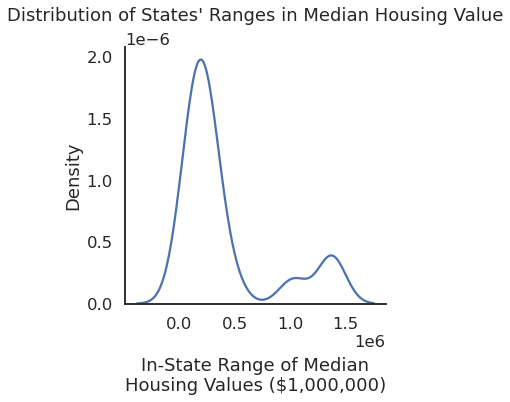

In [16]:
state_hous_range_maxes = sorted(df['state_hous_range'].unique(), reverse=True)[:2]
print(f"visual outliers (in the smaller peak): {list(df[(df['state_hous_range'] == state_hous_range_maxes[0]) | (df['state_hous_range'] == state_hous_range_maxes[1])]['state'].unique())}")
sns.displot(data=df, x='state_hous_range', kind='kde')
plt.title('Distribution of States\' Ranges in Median Housing Value\n')
plt.xlabel('\nIn-State Range of Median\nHousing Values ($1,000,000)')
plt.show()

To bin `state_hous_val` into three discrete bins, we want one bin to encompass just the outliers of California and New York and two bins to split the remaining data into further subgroups to see whether the extremeness of in-state housing ranges accounts for the absence of a relationship between `med_age` and `med_hous`.

In [17]:
df['state_hous_range_bin'] = pd.cut(df['state_hous_range'], 
                                    pd.IntervalIndex.from_tuples([(-1, 200000), 
                                                                  (200000, 600000), 
                                                                  (600000, 2000000)]))

def bin_vals(string):
    string = str(string).replace('(-1, 200000]', '0')
    string = str(string).replace('(200000, 600000]', '1')
    string = str(string).replace('(600000, 2000000]', '2')
    return int(string)

# df['state_hous_range'] = df['state_hous_range'].apply(bin_vals)

df

,district,state,med_age,med_hous,state_hous_range,state_hous_range_bin
0,District 01,Alabama,40.4,160600,98600,"(-1, 200000]"
1,District 02,Alabama,39.0,135500,98600,"(-1, 200000]"
2,District 03,Alabama,38.9,144700,98600,"(-1, 200000]"
3,District 04,Alabama,41.1,132800,98600,"(-1, 200000]"
4,District 05,Alabama,39.7,173300,98600,"(-1, 200000]"
...,...,...,...,...,...,...
430,District 05,Wisconsin,42.5,252700,114100,"(-1, 200000]"
431,District 06,Wisconsin,42.0,174700,114100,"(-1, 200000]"
432,District 07,Wisconsin,45.0,168100,114100,"(-1, 200000]"
433,District 08,Wisconsin,40.8,180000,114100,"(-1, 200000]"


We then created a scatterplot for each of the three bins, with each subplot plotting that bin's relationship between `med_age` and `med_hous` to see if there is a higher correlation within a particular bin rather than across all bins. The correlation coefficient within each bin, as displayed in the top right of respective subplots, is still quite minimal, though the magnitude of each is greater than the magnitude of the cross-bin correlation coefficient of `r=-0.04875`. Comparing these subplots, we see that binning the median housing values by in-state ranges of median housing values still does not establish a correlation.

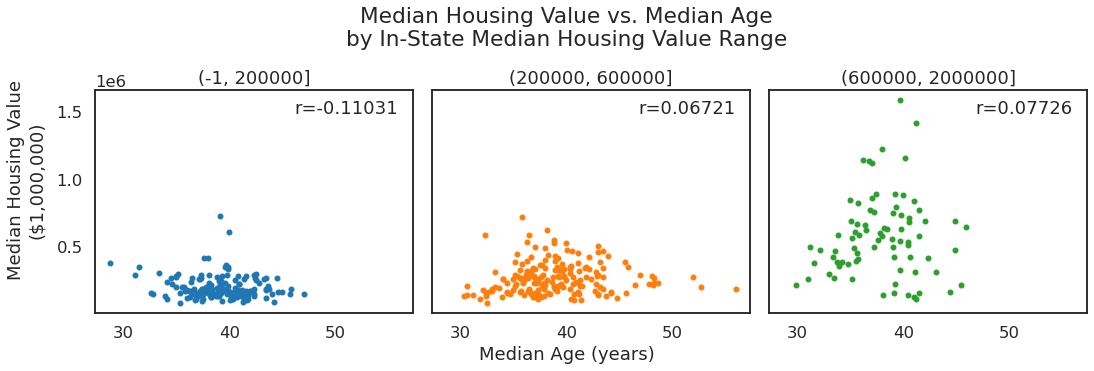

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)
fig.suptitle('Median Housing Value vs. Median Age\nby In-State Median Housing Value Range\n\n')
colors = ['tab:blue', 'tab:orange', 'tab:green']
for axis in range(3):
    ax[axis].scatter(data=df[df['state_hous_range_bin'] == df['state_hous_range_bin'].unique()[axis]], 
                     x='med_age', y='med_hous', s=20, color=colors[axis])
    ax[axis].set_title(f"{df['state_hous_range_bin'].unique()[axis]}")
    ax[axis].text(df['med_age'].max(), df['med_hous'].max()-100000, f"r={round(df[df['state_hous_range_bin'] == df['state_hous_range_bin'].unique()[axis]]['med_age'].corr(df[df['state_hous_range_bin'] == df['state_hous_range_bin'].unique()[axis]]['med_hous']), 5)}", ha='right')

fig.text(0.5, 0, 'Median Age (years)', ha='center')
fig.text(0, 0.5, 'Median Housing Value\n($1,000,000)', ha='center', va='center', rotation='vertical')
plt.ticklabel_format(axis='y', style='sci')

plt.tight_layout()
fig.subplots_adjust(top=0.75)
plt.show()

Since these bins were not sufficient to see whether the ranges were a significant factor within the states, we decided to compare the correlations across the states instead. The dictionary `state_corr` contains each state's correlation coefficient for `med_age` and `med_hous` based on their districts and demonstrates variability in these values. States with a `nan` value represent states with a single at-large district, meaning only a single data point and not enough to establish a (non-null) correlation. States with a `-1.0` or `1.0` value represent states with only two congressional districts.

In [19]:
state_corr = {}
for state in df['state'].unique():
    state_corr[state] = df[df['state']==state]['med_age'].corr(df[df['state']==state]['med_hous'])

state_corr

{'Alabama': 0.5130088679575467,
 'Alaska': nan,
 'Arizona': 0.26651385884919415,
 'Arkansas': -0.9719042498521909,
 'California': 0.4430304583209993,
 'Colorado': -0.4822877873997705,
 'Connecticut': -0.7436168212101018,
 'Delaware': nan,
 'Florida': -0.007646771238306847,
 'Georgia': 0.13573988141237922,
 'Hawaii': -1.0,
 'Idaho': 1.0,
 'Illinois': -0.303288582830792,
 'Indiana': 0.08895052365012907,
 'Iowa': -0.8253534756584462,
 'Kansas': -0.02397148680169424,
 'Kentucky': -0.8213039600227197,
 'Louisiana': -0.1420744941171196,
 'Maine': -1.0,
 'Maryland': 0.160748221994953,
 'Massachusetts': -0.48709426584682,
 'Michigan': 0.1936035512348948,
 'Minnesota': -0.4178558193988267,
 'Mississippi': 0.9750787069497693,
 'Missouri': 0.7575754973968702,
 'Montana': nan,
 'Nebraska': -0.9979054898455024,
 'Nevada': 0.9845248604186696,
 'New Hampshire': -1.0,
 'New Jersey': 0.14958797651302133,
 'New Mexico': 0.947979732584009,
 'New York': -0.42286853377155936,
 'North Carolina': -0.45087022

We then count the number of districts in each state, `zip` that to a dictionary with the keys being all of the states, and map that onto `df` based on these 'state' values, creating a column in `df` called `state_num_dist` that contains the value for how many districts a given state consists of. These values are then binned into 

In [20]:
df['state_num_dist'] = df['state'].map(dict(zip(df['state'].unique(), [len(df[df['state']==state]['district'].unique()) for state in df['state'].unique()])))
df

,district,state,med_age,med_hous,state_hous_range,state_hous_range_bin,state_num_dist
0,District 01,Alabama,40.4,160600,98600,"(-1, 200000]",7
1,District 02,Alabama,39.0,135500,98600,"(-1, 200000]",7
2,District 03,Alabama,38.9,144700,98600,"(-1, 200000]",7
3,District 04,Alabama,41.1,132800,98600,"(-1, 200000]",7
4,District 05,Alabama,39.7,173300,98600,"(-1, 200000]",7
...,...,...,...,...,...,...,...
430,District 05,Wisconsin,42.5,252700,114100,"(-1, 200000]",8
431,District 06,Wisconsin,42.0,174700,114100,"(-1, 200000]",8
432,District 07,Wisconsin,45.0,168100,114100,"(-1, 200000]",8
433,District 08,Wisconsin,40.8,180000,114100,"(-1, 200000]",8


Dictionary `state_corr_abs` contains the magnitudes of the in-state correlations of median age and median housing value by taking the absolute value of that correlation, since the direction does not matter, but rather the strength. These values are then mapped back onto `df` by 'state'.

In [21]:
state_corr_abs = {}
for state in df['state'].unique():
    state_corr_abs[state] = np.abs(state_corr[state])

df['state_corr'] = df['state'].map(state_corr_abs)
df

,district,state,med_age,med_hous,state_hous_range,state_hous_range_bin,state_num_dist,state_corr
0,District 01,Alabama,40.4,160600,98600,"(-1, 200000]",7,0.513009
1,District 02,Alabama,39.0,135500,98600,"(-1, 200000]",7,0.513009
2,District 03,Alabama,38.9,144700,98600,"(-1, 200000]",7,0.513009
3,District 04,Alabama,41.1,132800,98600,"(-1, 200000]",7,0.513009
4,District 05,Alabama,39.7,173300,98600,"(-1, 200000]",7,0.513009
...,...,...,...,...,...,...,...,...
430,District 05,Wisconsin,42.5,252700,114100,"(-1, 200000]",8,0.133724
431,District 06,Wisconsin,42.0,174700,114100,"(-1, 200000]",8,0.133724
432,District 07,Wisconsin,45.0,168100,114100,"(-1, 200000]",8,0.133724
433,District 08,Wisconsin,40.8,180000,114100,"(-1, 200000]",8,0.133724


This scatterplot plots the magnitude of the in-state correlation of median age and median housing value against the number of congressional districts in that state. We wanted to determine whether the number of districts in a state was a primary factor in whether the magnitude of that state's correlation was very high. We see that with the cluster of data points in the bottom right of the scatterplot, states with a very strong magnitude of correlation also have very few districts in their state, so we believe that strong correlations are actually incidental due to number of districts in a state rather than because of a state's districts' median ages or median housing values.

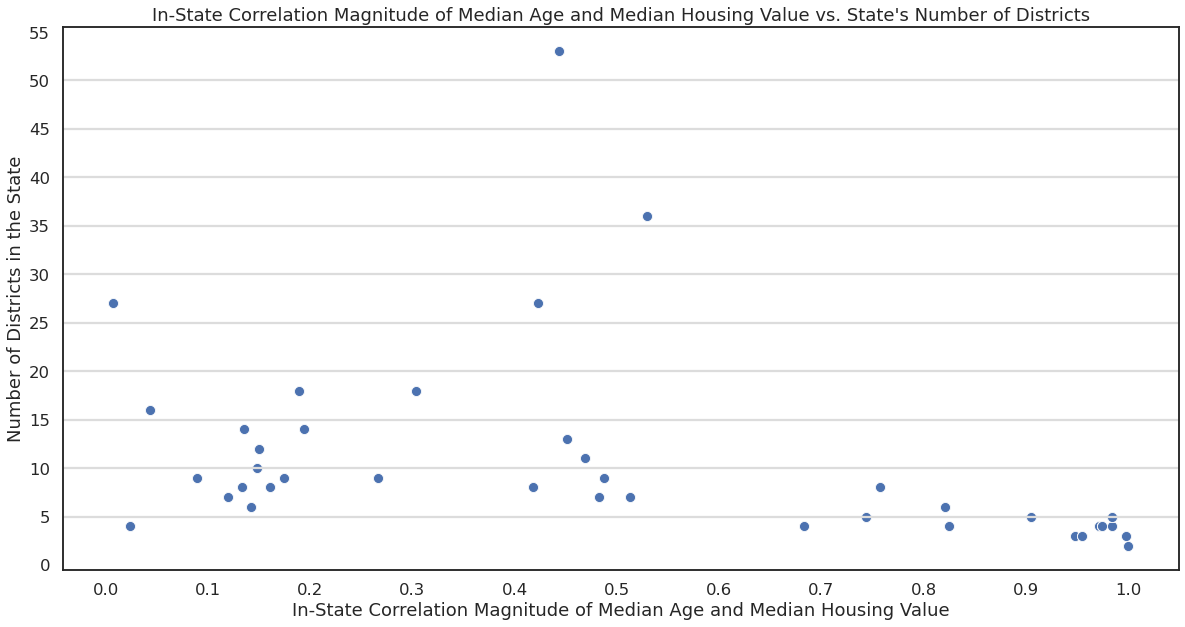

In [22]:
sns.scatterplot(data=df, x='state_corr', y='state_num_dist', s=100)

plt.title('In-State Correlation Magnitude of Median Age and Median Housing Value vs. State\'s Number of Districts')
plt.xlabel('In-State Correlation Magnitude of Median Age and Median Housing Value')
plt.ylabel('Number of Districts in the State')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 60, step=5))
[plt.axhline(y, 0, 55, color='gainsboro') for y in range(5,55,5)]

plt.show()

# Ethics & Privacy

Due to the logistical nature of the census, there are certain cohorts that may be systematically excluded from the census, including, for example, homeless people who do not receive the census, low-income people who are too occupied with multiple jobs to fill out the census, people who may not be provided the census in their native language, and others who may not complete the census for fear of deportation. Though they do not comprise a monolith, by being excluded from participation in the census, whether intentionally or incidentally, the data may not be representative of and may therefore be biased against them. Despite this drawback, the census was the best option available to us to seek as representative a sample of the country as possible. As participation in the census is voluntary, the data has been collected with attention to consent.
Another ethical consideration would be the consequences in regard to areas such as policy-making for particular demographic groups who may be negatively impacted by conclusions as a result of our analysis. To answer that question, we may consider the following scenario: if there seems to be some generation that has a lower cost of living, we could do something with this data in order to help those people rather than hurt them. However, one implication is that even if a certain group benefits as a whole, it may negatively affect other people on a more fine-grained level due to factors that may be confounded.

The data itself is anonymous and private, which will reduce the stakes for those who participate in the census on an individual level. This set of data is also available for the public to see, making these correlations replicable for anyone who could ask this same question. We would like to acknowledge, however, that certain confounders like socioeconomic status may have the potential to distort the establishment of an association between our two variables. In our analysis, we do not have any spurious correlations, as the overall correlation does not seem to be significant. 

# Conclusion & Discussion

To draw a relevant conclusion that we felt could apply to many if not all residents of the United States, we consolidated a list of the 435 US congressional districts and used census data, namely the median age and median housing value, for each of the districts. Our primary goal was to determine whether a relationship exists between a district’s median age and median cost of living — using a district’s median housing value as an indicator of the latter — across congressional districts in a given state in 2019. Since both variables are quantitative, we first started by conducting linear regression analysis on these variables and saw a very low correlation between the variables when comparing across all congressional districts. We then went through different transformations on the median housing value variable because we noticed that the median housing values did not conform to a normal distribution. Our analysis resulted in either high correlation coefficients due to small in-state sample sizes or low correlation coefficients despite the presence of more congressional districts in a given state (and every district containing approximately 750,000 inhabitants), which is insufficient in determining a significant relationship between the variables in question on both accounts.

This limitation of small in-state sample sizes for some values in our dataset was compounded by the fact that a single median value for each variable is used to represent an entire congressional district, thus oversimplifying the complexity of this information as it exists and varies on a finer individual and geographical scale in the real world. A choropleth map, for example, could group regions with similar values for median housing value based on data at the district level encoding this metric, as these values may have edge effects relative to one another. A choropleth map, for example, could group regions with similar values for median housing value based on data at the district level encoding this metric, as these values may have edge effects relative to one another. Regardless, the demographic cohorts who are systematically excluded from participation in the census historically own homes with lower property values, bringing the mean of the values closer to its median in that sampling distribution. While we cannot use our dataset to conclude that a relationship exists between the variables, a relationship may be found in an ideal setting if we were to have access to every American residents’ age as well as multiple factors that contribute to one’s cost of living, including property value and disposable income. Such a conclusion would illuminate a disparity across age groups with respect to attaining wealth and maintaining financial stability.

# References

Hankin, Aaron. “5 Reasons Millennials Aren’t Buying Homes.” Investopedia, https://www.investopedia.com/news/real-reasons-millennials-arent-buying-homes/. Accessed 11 Mar. 2021.

Smith, Noah and Bloomberg. “Millennials Can’t Afford Homes after Exiting the Basement.” Newsday, https://www.newsday.com/opinion/commentary/millennials-afford-homes-living-with-parents-economy-1.46077032. Accessed 11 Mar. 2021.

# Team Contributions

- **Research Question, Hypothesis**: all (Akil, Casey, Doanh, Sepideh)
- **Overview**: Doanh
- **Background & Prior Work**: Doanh
- **Ethics & Privacy**: Casey
- **Dataset, Setup, Data Cleaning**: all (Akil, Casey, Doanh, Sepideh)
- **Data Analysis & Results**: Akil, Sepideh
- **Conclusion & Discussion**: Akil, Sepideh